# Stanford EE179 Lab 2

Python translation of https://web.stanford.edu/class/ee179/labs/Lab2.html

I/Q data explanation: http://whiteboard.ping.se/SDR/IQ

In [6]:
%matplotlib inline

import cv2
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.signal import decimate, resample
from scipy.io import wavfile
from math import pi
from numpy.fft import fft, fftshift

In [11]:
filepath = "/home/thomas/code/python-ax25-experiment/assets/ab1355_10s.dat"

In [2]:
# This loads the signed sequence of byte I and Q values, and stores them as complex array
def load_file(path):
    file = np.fromfile(filepath, dtype='uint8')
    file = file.astype('int32')
    file = file - 127
    file = file[::2] + 1j * file[1::2]
    return file

In [57]:
def my_spectrogram(x,n0,nf,nt,dbf = 40):
    #  Computes a spectrogram
    #       x  -- input signal
    #       n0 -- first sample
    #       nf -- block size for transform
    #       nt -- number of time steps (blocks)

    #   This extracts a segment of x starting at n0, of length nf*nt
    #   The image plot is in dB, and autoscaled.  This can look very noisy
    #      if there aren't any interesting signals present.

    # rearrange the RF data into a 2D matrix of blocks versus time
    xm = np.reshape(x[ n0:(n0+nf*nt) ], (nf, nt), order='F')

    # Do transforms for each block
    xmf = fftshift(fft(xm),1)

    xmfa = abs(xmf)
    mx = np.amax(xmfa)

    xmfal = 20*np.log10(xmfa/mx)

    plt.imshow(256*(xmfal+dbf)/dbf, vmin=0, vmax=256)
    
    # return the result, in case the user wants it
    return np.transpose(xmf)

In [58]:
file = load_file(filepath)

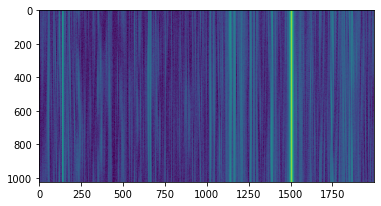

In [59]:
ds = my_spectrogram(file, 1, 1024, 2000)

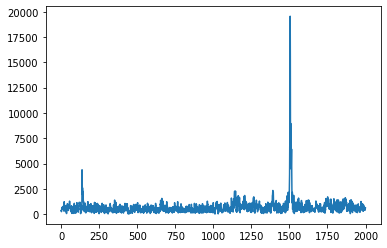

In [89]:
plt.plot(abs(ds[:,1000]))

#plot(abs(ds(:,1000));

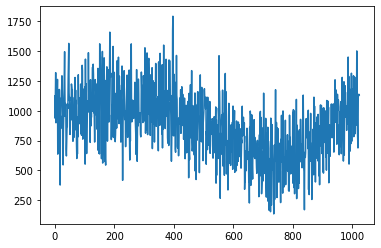

In [98]:
plt.plot(abs(ds[125]))

In [97]:
abs(ds[:,1000])[125]

1167.6983191089407